<a href="https://colab.research.google.com/github/blibbliblo/Breast-Cancer-K-Nearest-Neighbor/blob/main/BreastKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [26]:
data = pd.read_csv(f"{path}/data.csv")

X = data.drop(columns=['id', 'diagnosis']).values
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

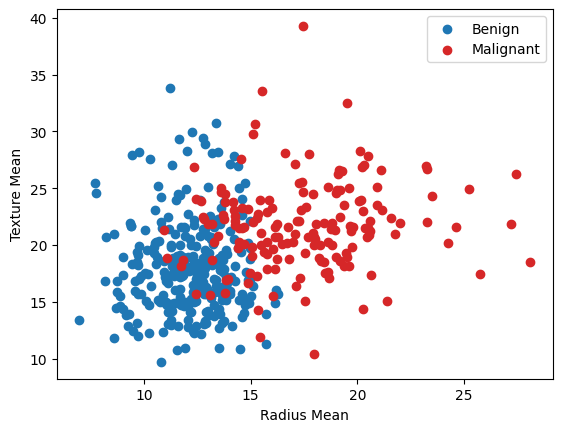

In [27]:
plt.scatter(X_train[y_train == 'B', 0], X_train[y_train == 'B', 1], color='tab:blue', label='Benign')
plt.scatter(X_train[y_train == 'M', 0], X_train[y_train == 'M', 1], color='tab:red', label='Malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()
# visualize data before prediction

In [28]:
nan_column = data.columns[data.isnull().all()].tolist()
print(f"Column with all NaN values: {nan_column}")

X = data.drop(columns=['id', 'diagnosis'] + nan_column).values
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
# clean NaN

Column with all NaN values: ['Unnamed: 32']
Shape of X_train: (455, 30)
Shape of X_test: (114, 30)


In [29]:
def standardize_data(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standardize_data(X_train, X_test)

print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
# scale (z=(xi-mean)/std)

Shape of X_train_scaled: (455, 30)
Shape of X_test_scaled: (114, 30)


In [30]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((b - a) ** 2))
# define euclidean distance which is just pythagoras (essential)

In [31]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, new_points):
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)

    def predict_class(self, new_point):
        distances = [euclidean_distance(point, new_point) for point in self.X_train]

        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]

        return most_common
# class KNN with its function

In [32]:
accuracies = []
for k in range(1, 51):
    knn = KNN(k)
    knn.fit(X_train_scaled, y_train)
    predictions = knn.predict(X_test_scaled)
    accuracy = np.mean(predictions == y_test) * 100
    accuracies.append((k, accuracy))
# loop for accuracy check and find optimal k

optimal_k = max(accuracies, key=lambda x: x[1])
print(f"Optimal k: {optimal_k[0]} with accuracy: {optimal_k[1]:.2f}%")

Optimal k: 3 with accuracy: 99.12%


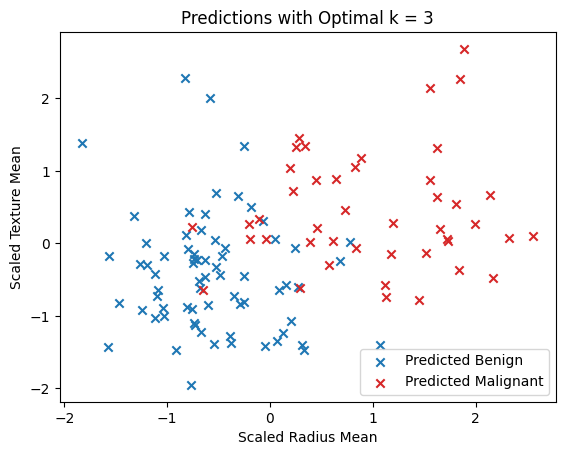

In [33]:
knn_optimal = KNN(optimal_k[0])
knn_optimal.fit(X_train_scaled, y_train)
predictions_optimal = knn_optimal.predict(X_test_scaled)

plt.scatter(X_test_scaled[predictions_optimal == 'B', 0], X_test_scaled[predictions_optimal == 'B', 1], color='tab:blue', label='Predicted Benign', marker='x')
plt.scatter(X_test_scaled[predictions_optimal == 'M', 0], X_test_scaled[predictions_optimal == 'M', 1], color='tab:red', label='Predicted Malignant', marker='x')
plt.xlabel('Scaled Radius Mean')
plt.ylabel('Scaled Texture Mean')
plt.title(f'Predictions with Optimal k = {optimal_k[0]}')
plt.legend()
plt.show()